In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### visualization

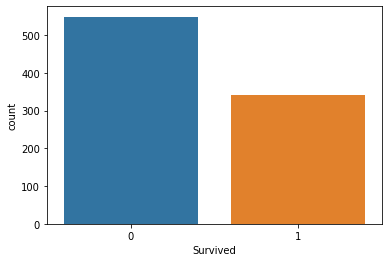

In [3]:
### for comparing 

#df["Sex"].value_counts().plot(kind="bar",color=["powderblue","orange"])
sns.countplot(x="Survived",data=df)

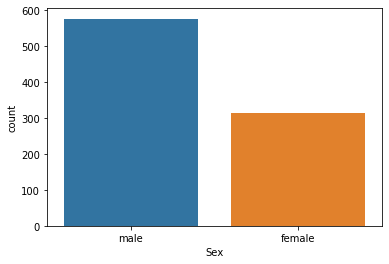

In [4]:
sns.countplot(x="Sex",data=df)

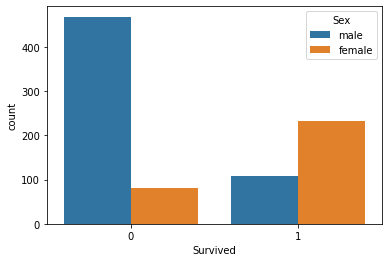

In [5]:
sns.countplot(x="Survived",hue="Sex",data=df)

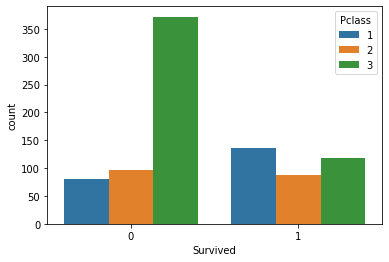

In [6]:
sns.countplot(x="Survived",hue="Pclass",data=df)

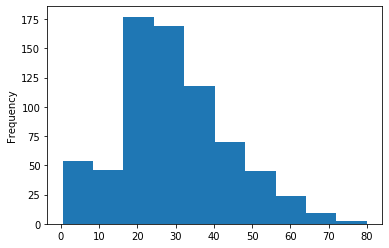

In [7]:
df.Age.plot.hist()

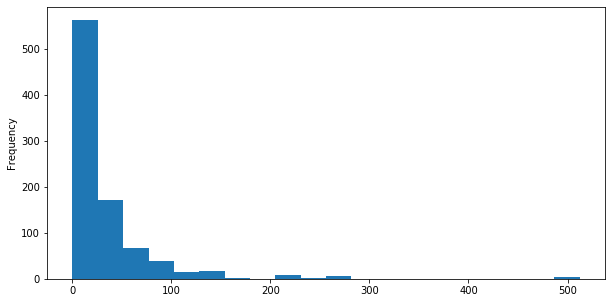

In [8]:
df.Fare.plot.hist(bins=20,figsize=(10,5))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### data wrangling

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

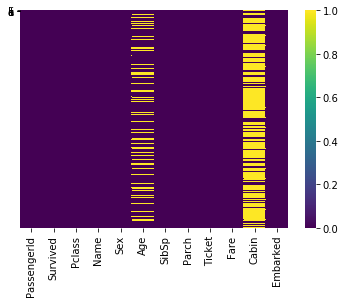

In [11]:
sns.heatmap(df.isnull(),yticklabels="False",cmap="viridis")

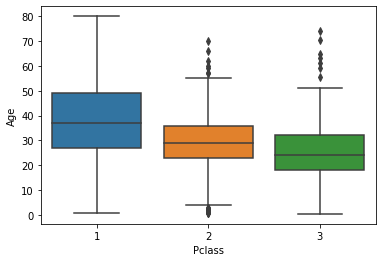

In [12]:
## comaprison between age and class
sns.boxplot(x="Pclass",y="Age",data=df)

In [13]:
male=pd.get_dummies(df.Sex,drop_first=True)
male.head()

,male
0,1
1,0
2,0
3,0
4,1


In [14]:
embark=pd.get_dummies(df.Embarked,drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [15]:
### we should also convert class also
classes=pd.get_dummies(df.Pclass,drop_first=True)
classes.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [16]:
### concating and drop faltu columns for model
df=pd.concat([df.drop(["Sex","Pclass","Name","PassengerId","Cabin","Ticket","Embarked"],1),classes,male,embark],1)

In [17]:
df.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [18]:
df.isnull().sum()

Survived      0
Age         177
SibSp         0
Parch         0
Fare          0
2             0
3             0
male          0
Q             0
S             0
dtype: int64

In [19]:
### we can drop na value
df.dropna(how="any",inplace=True)
df.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [20]:
X=df.drop(["Survived"],1)
y=df["Survived"]

In [21]:
X.shape,y.shape

((714, 9), (714,))

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,shuffle=True)### setting Shuffle increase the accuracy

In [23]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(n_jobs=-1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7692307692307693

In [24]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [25]:
confusion_matrix(y_test,model.predict(X_test))


array([[74, 12],
       [21, 36]], dtype=int64)

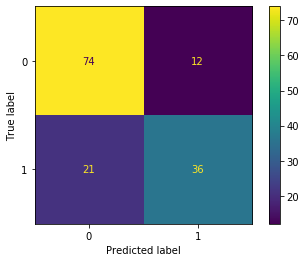

In [26]:
plot_confusion_matrix(model,X_test,y_test)